In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Loading the amazon UK dataset 
file_path = "C:/Users/sophi/Ironhack/Ironhack/Ironhack_prework_Jupyter/Week5/labs/data_source/amz_uk_price_prediction_dataset.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
#Frequency Tables:

#Generate a frequency table for the product category
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

pd.DataFrame(frequency_table)


,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [4]:
#Which are the top 5 most listed product categories?
top_5 = frequency_table.head(5)
display(top_5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

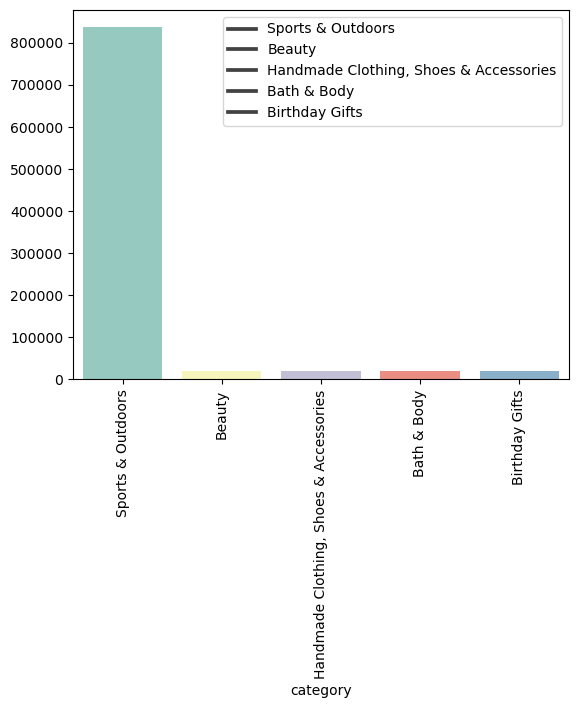

In [5]:
from matplotlib.patches import Patch

sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")
plt.xticks(rotation=90)
plt.legend(top_5.index, loc= "upper right") 

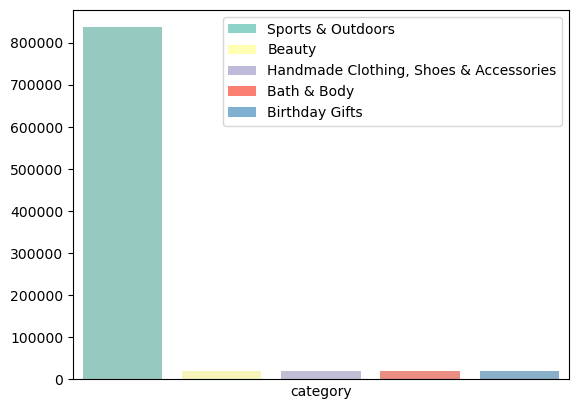

In [6]:
ax = sns.barplot(x=top_5.index, y=top_5.values, palette="Set3")

# Rotating x-axis labels
plt.xticks([])

# Creating a custom legend
legend_elements = [Patch(facecolor=sns.color_palette("Set3")[i], label=top_5.index[i]) for i in range(len(top_5))]
plt.legend(handles=legend_elements, loc="upper right")

plt.show()

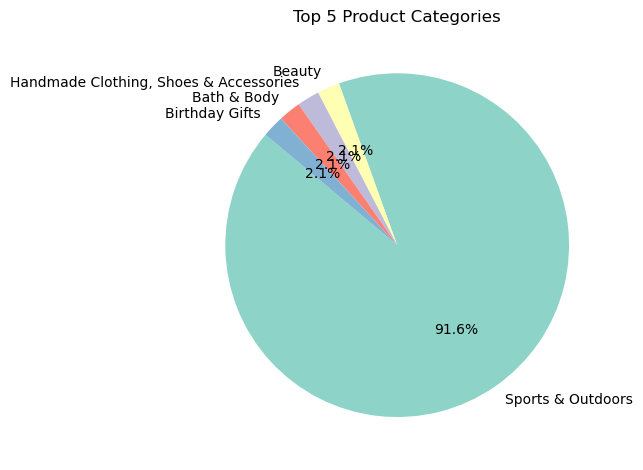

In [7]:
# Plotting a pie chart of the 'Top_5' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
plt.pie(top_5, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"), labels =top_5.index )


# Adding a title
plt.title('Top 5 Product Categories')
# Adjusting layout to prevent overlapping labels
plt.tight_layout()

plt.show()


## the top ordered category is sports and outdoor products

In [8]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [9]:
#Frequency Tables:

#Generate a frequency table for the product category
# Frequency table for 'category'
frequency_table = df['price'].value_counts()

pd.DataFrame(frequency_table)


,count
price,
9.99,48922
12.99,38823
8.99,34058
7.99,33632
14.99,32570
...,...
2398.99,1
1453.08,1
1785.63,1


In [10]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode= df['price'].mode()
display(price_mean)
display(price_median)
display(price_mode)

89.24380943923663

19.09

0    9.99
Name: price, dtype: float64

In [11]:
# Comparing mean with mode
if price_mean > price_mode[0]:
    print("The average price point is higher than the most common price point.")
elif price_mean < price_mode[0]:
    print("The average price point is lower than the most common price point.")
else:
    print("The average price point is equal to the most common price point.")

The average price point is higher than the most common price point.


In [12]:
#determining the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [13]:
# Calculating the first quartile (Q1)
Q1 = np.percentile(df['price'],25)

# Calculating the third quartile (Q3)
Q3 = np.percentile(df['price'],75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for Price:", IQR)

Interquartile Range (IQR) for Price: 36.0


Text(0.5, 1.0, 'Histogram of Prices')

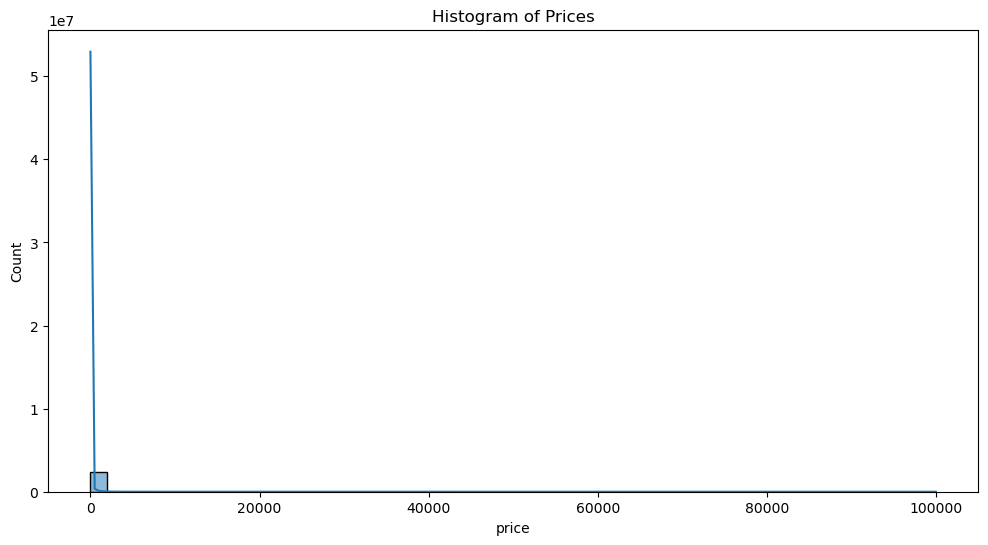

In [14]:
# Visualization for answering the spread of prices using histogram
plt.figure(figsize=(12, 6))

sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram of Prices')


In [15]:
skewness_price = df['price'].skew()
skewness_price

27.492977566280338

## difficult to read output as the data is highly skewed to the right with very few items of extremely high price 

In [16]:
## discretizing to get an idea of the data below. which shows that most of the products are price below price of 10000(units)

In [17]:
# Discretizing 'price' into 4 categories
bins = [0, 10000, 20000, 30000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [18]:
df.price_category.value_counts()

price_category
Low          2443484
Medium           154
High              11
Very High          2
Name: count, dtype: int64

<Axes: >

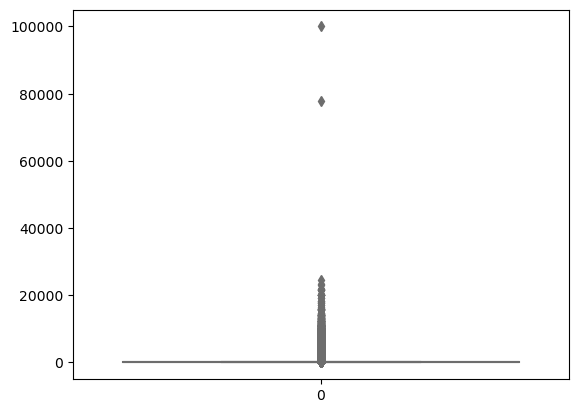

In [19]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
#for boxplot
sns.boxplot(data = df['price'], color = 'salmon')

In [20]:
# Box plot shows to outliers in the upper price range around 80000 and 100000

## Part 3: Unpacking Product Ratings

In [21]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [22]:
stars_mean = df['stars'].mean()
stars_median = df['stars'].median()
stars_mode= df['stars'].mode()
stars_std = df['stars'].std()
stars_min = df['stars'].min()
stars_max = df['stars'].max()

# Print descriptive statistics
print("Mean Rating:", stars_mean)
print("Median Rating:", stars_median)
print("Standard Deviation of Rating:", stars_std)
print("Minimum Rating:", stars_min)
print("Maximum Rating:", stars_max)




Mean Rating: 2.152836472966065
Median Rating: 0.0
Standard Deviation of Rating: 2.1948653785054697
Minimum Rating: 0.0
Maximum Rating: 5.0


In [23]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

In [24]:
#Skewness is approximately 0.081, indicates a slight skewness towards higher rating values
#based on kurtosis the ratings have thinner tails and a flatter peak than the normal distribution. 

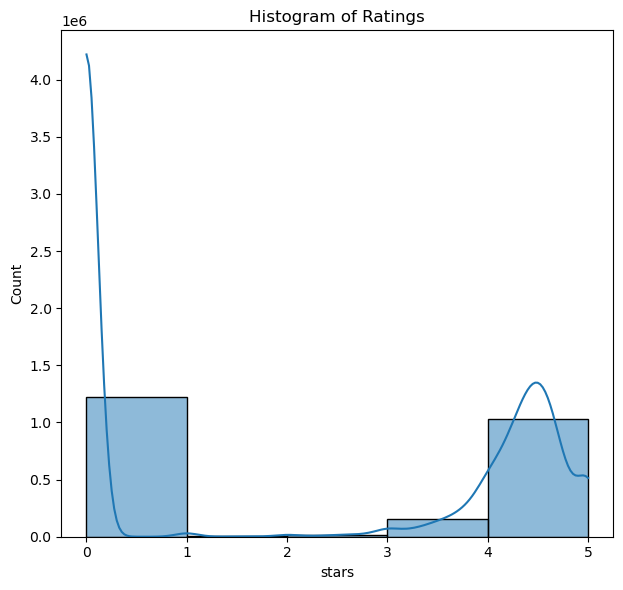

In [25]:
# Visualization with histogram to see the rating distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['stars'], bins=5, kde=True)
plt.title('Histogram of Ratings')

plt.tight_layout()
plt.show()

## Bivariate analysis lab continued

In [26]:
# Crosstab Analysis:

#Create a crosstab between the product category and the isBestSeller status.
# Generating a crosstab 
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [31]:
# Calculate proportions of best-sellers for each category
crosstab_result['Proportion_BestSeller'] = crosstab_result[1] / (crosstab_result[0] + crosstab_result[1])

# Sort categories based on proportion of best-sellers in descending order
sorted_categories = crosstab_result.sort_values(by='Proportion_BestSeller', ascending=False)

sorted_categories

isBestSeller,False,True,Proportion_BestSeller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [42]:
import scipy.stats
# Performing Chi-square test
#chi2, p, dof, expected = scipy.stats.chi2_contingency(crosstab_result)

# Computing Cramér's V
n = crosstab_result.sum().sum()
phi2 = chi2 / n
r, k = crosstab_result.shape
cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)



Chi-square statistic: 36684.23786636857
p-value: 0.0
Cramér's V: 0.08663731815334759


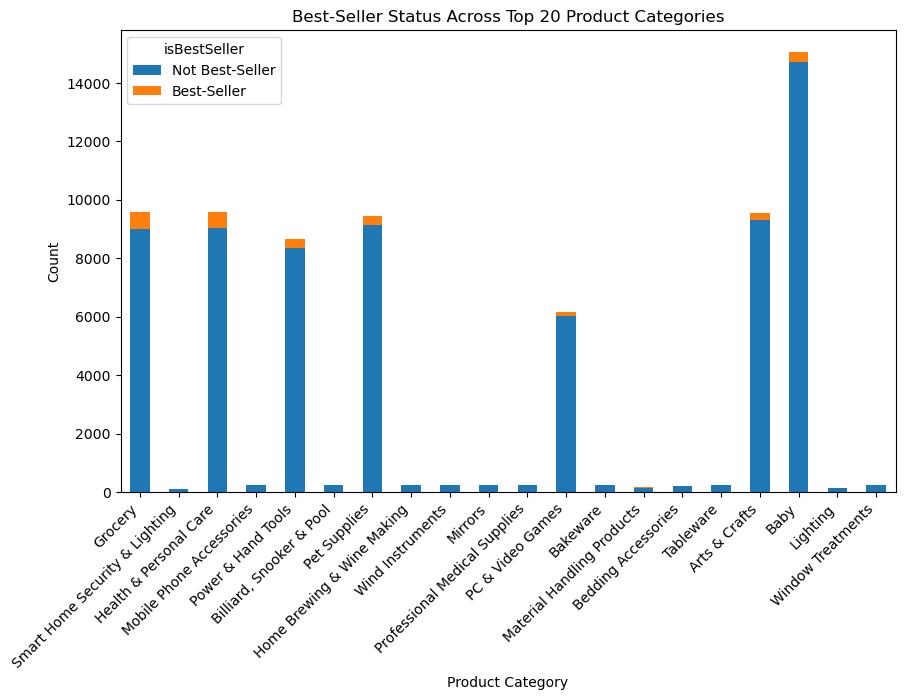

In [34]:

import matplotlib.pyplot as plt
# Selecting only top 20 best-seller categories for better visualization
top_20_categories = sorted_categories.head(20)

# Visualize relationship between top 20 product categories and best-seller status using a stacked bar chart
top_20_categories[[0, 1]].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Best-Seller Status Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='isBestSeller', labels=['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=45, ha='right')
plt.show()


## As p value is 0 , null hyp is rejected. best seller is not independent of category and there is a dependency between the two columns.

## Part 2: Exploring Product Prices and Ratings Across Categories and Brand

In [36]:
# Step 1: Remove outliers in product prices using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Using the filtered df for visualization


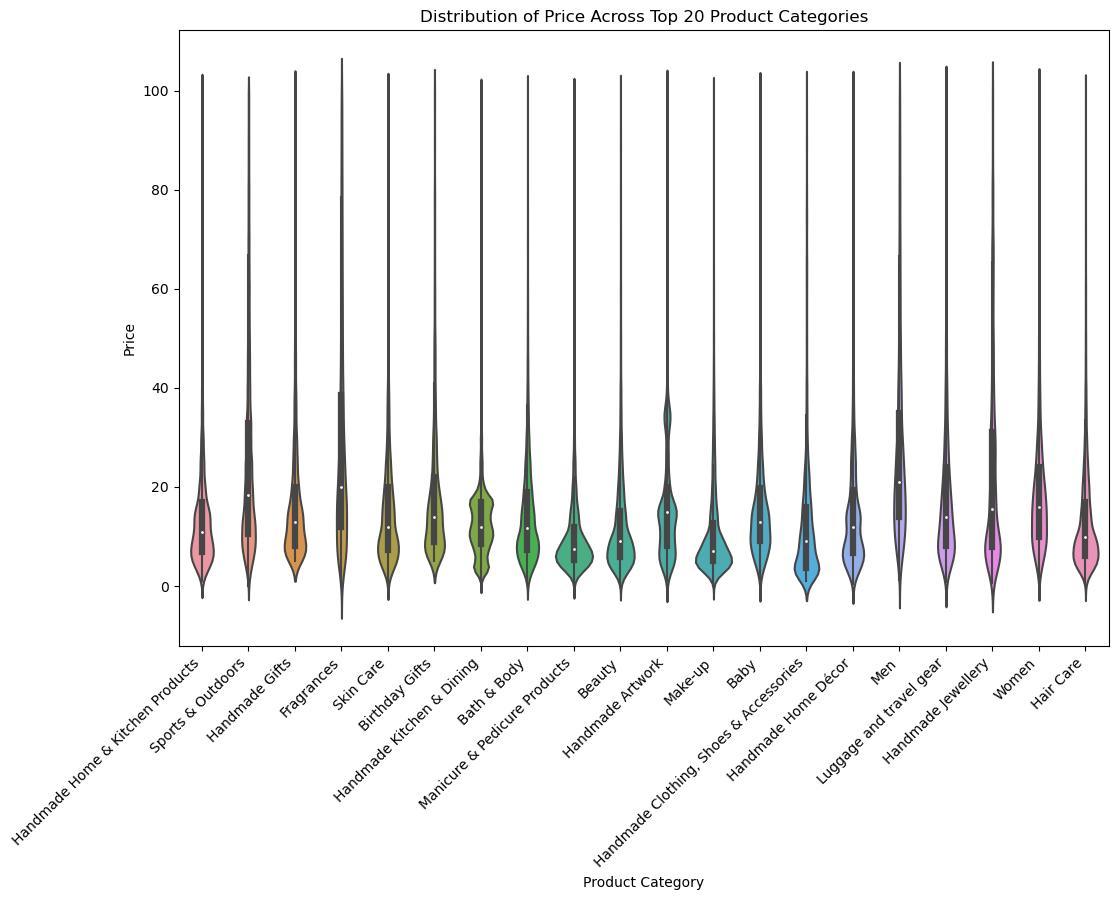

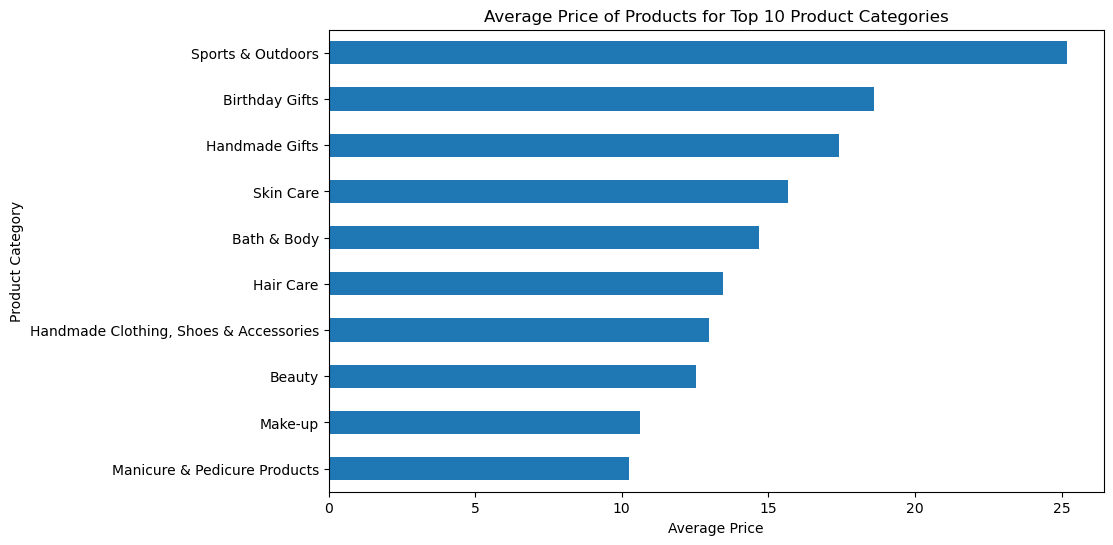

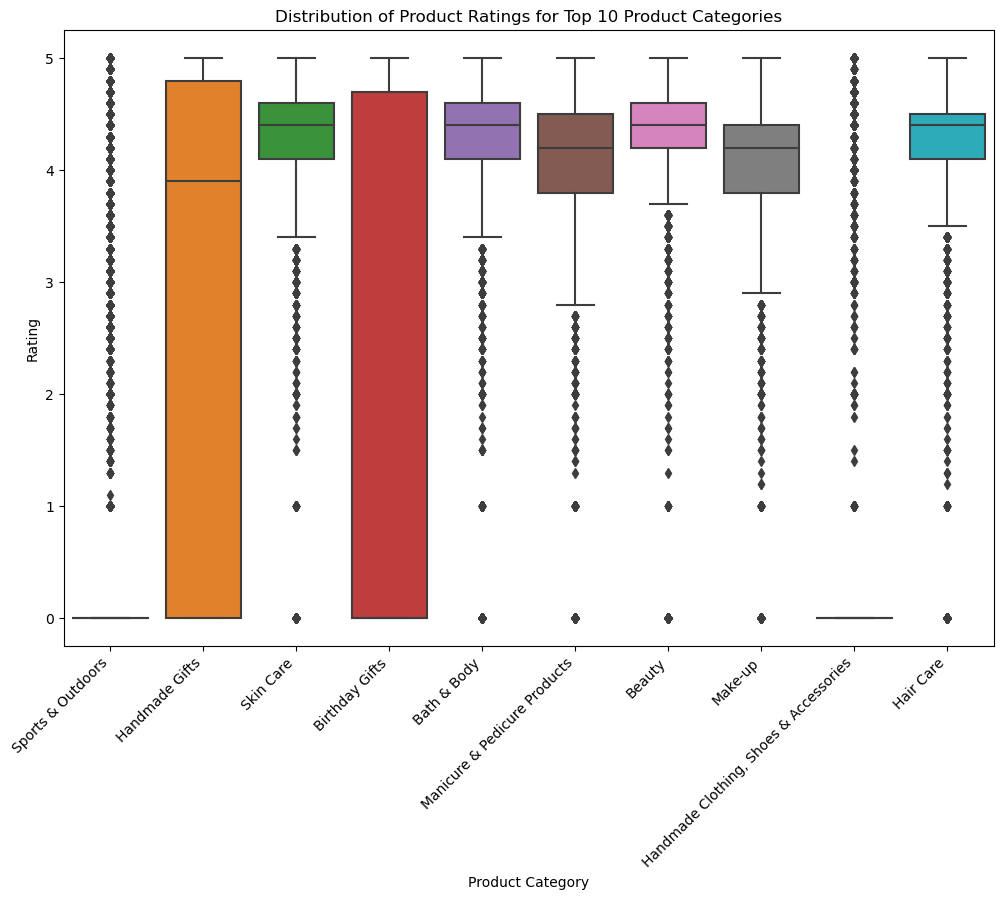

In [39]:
# Step 2: Violin Plot - Distribution of Price Across Different Product Categories
top_20_categories_count = df_filtered['category'].value_counts().head(20).index
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_filtered[df_filtered['category'].isin(top_20_categories_count)])
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.show()

# Step 3: Bar Chart - Average Price of Products for Top 10 Product Categories
top_10_categories = df_filtered['category'].value_counts().head(10).index
average_price_by_category = df_filtered.groupby('category')['price'].mean().loc[top_10_categories]
plt.figure(figsize=(10, 6))
average_price_by_category.sort_values().plot(kind='barh')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.show()

# Step 4: Box Plot - Distribution of Product Ratings Based on Category
top_10_categories_count = df_filtered['category'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_filtered[df_filtered['category'].isin(top_10_categories_count)])
plt.title('Distribution of Product Ratings for Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.show()


## Part 3: Investigating the Interplay Between Product Prices and Ratings

In [40]:
# Step 1: Calculate the correlation coefficient between price and stars
correlation_coefficient = df_filtered['price'].corr(df_filtered['stars'])
print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

# Step 2: Determine if there is a significant correlation
# We can also conduct a hypothesis test to determine if the correlation coefficient is significantly different from 0.
# This can be done using scipy's pearsonr function or stats module.
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df_filtered['price'], df_filtered['stars'])

# Check if correlation coefficient is significantly different from 0
if p_value < 0.05:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")


Correlation Coefficient between Price and Stars: -0.07767299878181323
There is a significant correlation between product price and its rating.


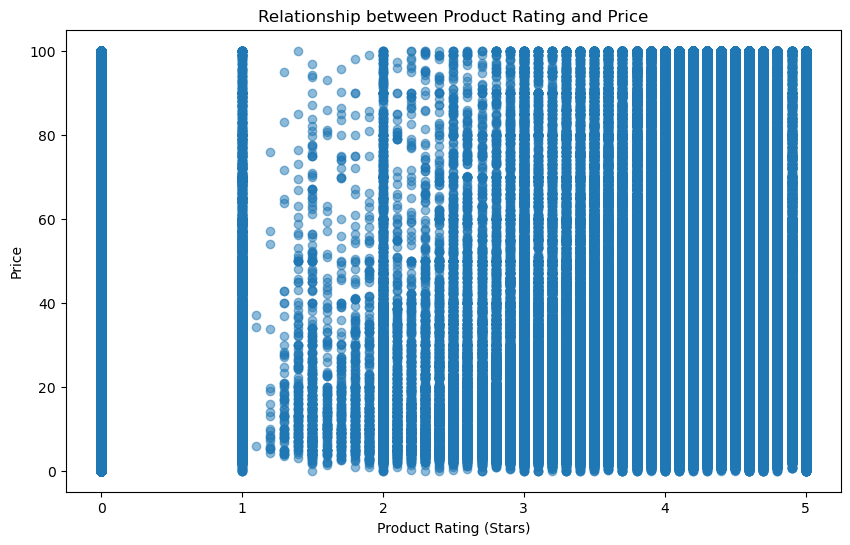

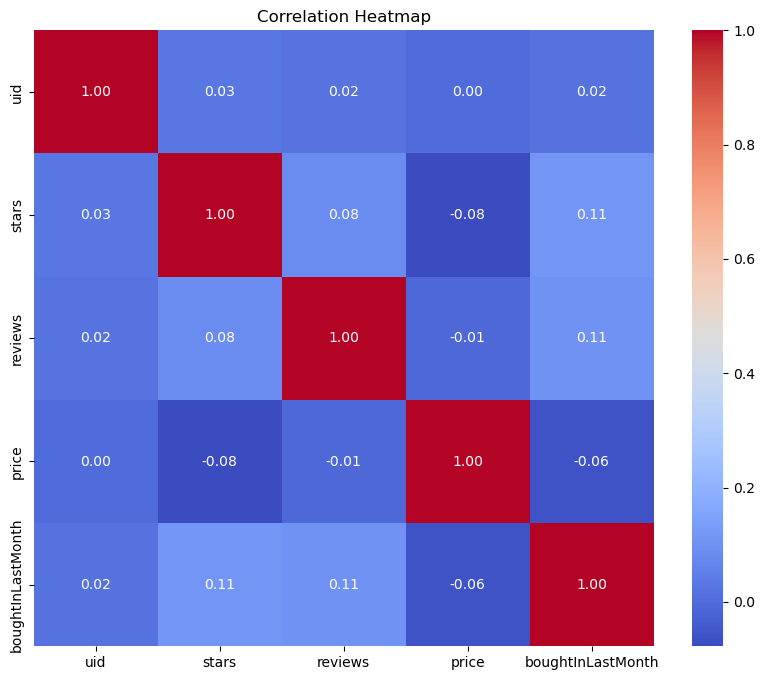

<Figure size 800x600 with 0 Axes>

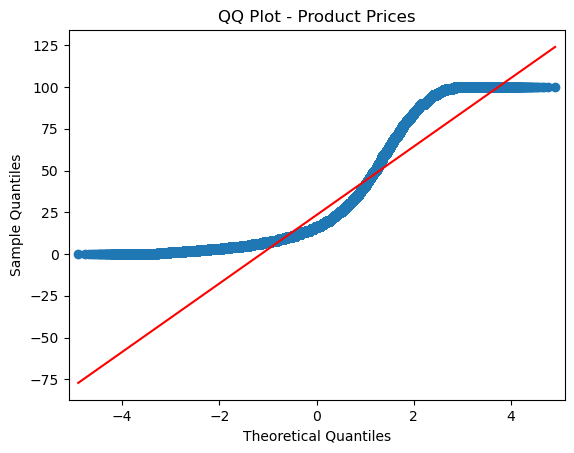

In [44]:
# Step 3: Scatter Plot - Relationship between Product Rating and Price
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['stars'], df_filtered['price'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.show()

# Step 4: Correlation Heatmap
numeric_columns = df_filtered.select_dtypes(include=['int', 'float']).columns
correlation_matrix = df_filtered[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Step 5: QQ Plot to examine normal distribution of product prices
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(df_filtered['price'], line='s')
plt.title('QQ Plot - Product Prices')
plt.show()
